Импортирование библиотек

In [239]:
import pandas
import numpy
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from statsmodels.graphics.api import qqplot

Загрузка входных данных

In [243]:
data = pandas.read_csv('data/lab1.csv', delimiter=',', header=0)
X = data["mni79"].dropna()
X

0     80.2
1     72.5
2     66.1
3     52.2
4     80.7
      ... 
79    64.3
80    71.7
81    75.3
82    64.5
83    45.5
Name: mni79, Length: 84, dtype: float64

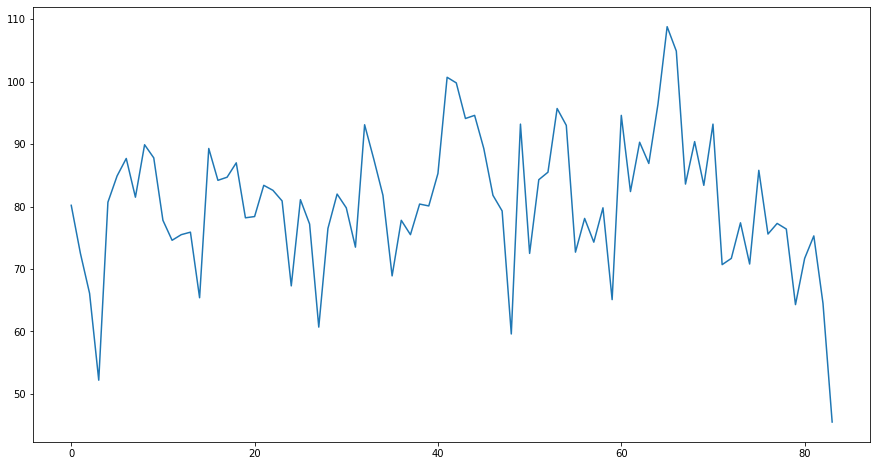

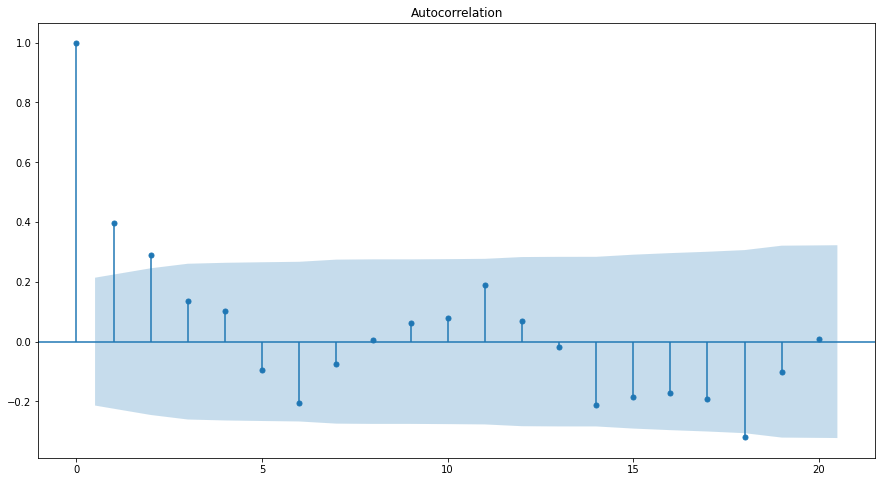

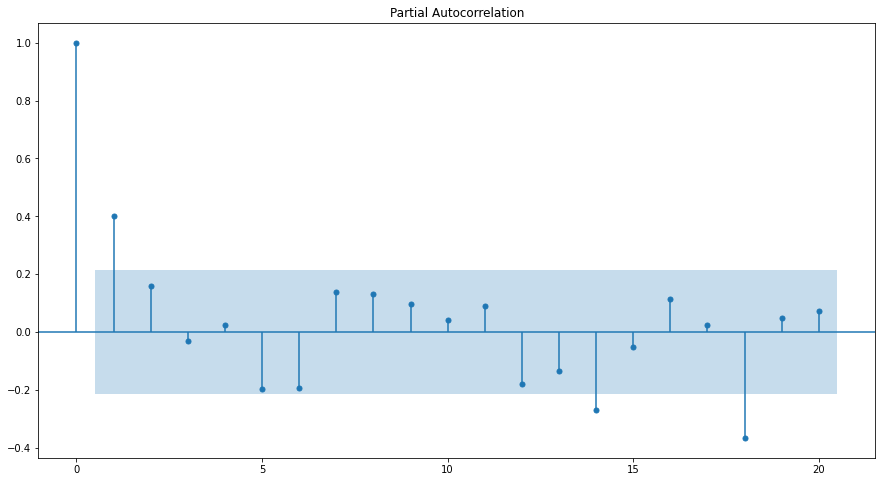

In [244]:
# plt.rcParams["figure.figsize"] = (15, 8)
kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(X)
plt.plot(X)
series = pandas.Series(X)
_ = plot_acf(series)
_ = plot_pacf(series)

ARMA()

In [246]:
for X_train_index, X_test_index in kf.split(X):
    X_train, X_test = X[X_train_index], X[X_test_index]
    Y = pandas.Series(X_train)

    for p in range(0, 3):
        for q in range (0, 2):
            model = ARIMA(X_train, order=(p, 0, q))
            mod = model.fit()
            aic = mod.aic
            bic = mod.bic
            pval = mod.pvalues
            for elem in pval:
                if elem > 0.05:
                    print(f'ARMA({p}, {q}) v pomoiky')
                    break
    break


/home/ilgiz/Documents/tris/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ilgiz/Documents/tris/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ilgiz/Documents/tris/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ilgiz/Documents/tris/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ilgiz/Documents/tris/venv/lib/

In [ ]:
# model_train.summary()
resid = model_train.resid
stats.normaltest(resid)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)